In [37]:
import numpy as np
import matplotlib.pyplot as plt

from scratchNNlib import NN
from scratchNNlib.Layers import LinearLayer
from scratchNNlib.Layers.ActivationLayer import ReLU, Softmax, Sigmoid
from scratchNNlib.Loss import BinaryCrossEntropy

In [38]:
def one_hot_encode(num: int, size: int = 10):
    out = np.zeros((1, size))
    out[0][num] =+ 1
    return out

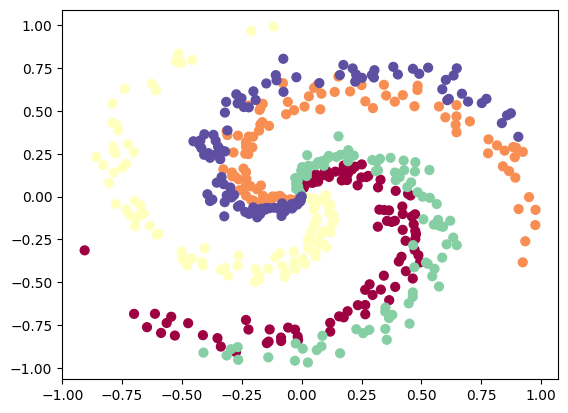

In [39]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [40]:
class SpiralNeural(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            LinearLayer(2, 10),
            ReLU(),
            LinearLayer(10, 5),
            ReLU(),
            LinearLayer(5, K),
            Softmax(),
        ]

epoch 1/1000   error=0.330290
epoch 2/1000   error=0.291331
epoch 3/1000   error=0.287789
epoch 4/1000   error=0.283588
epoch 5/1000   error=0.279548
epoch 6/1000   error=0.279406
epoch 7/1000   error=0.275993
epoch 8/1000   error=0.271028
epoch 9/1000   error=0.266536
epoch 10/1000   error=0.262673
epoch 11/1000   error=0.258941
epoch 12/1000   error=0.255613
epoch 13/1000   error=0.252531
epoch 14/1000   error=0.249525
epoch 15/1000   error=0.246635
epoch 16/1000   error=0.243688
epoch 17/1000   error=0.240775
epoch 18/1000   error=0.237861
epoch 19/1000   error=0.235085
epoch 20/1000   error=0.232417
epoch 21/1000   error=0.229849
epoch 22/1000   error=0.227194
epoch 23/1000   error=0.224768
epoch 24/1000   error=0.222410
epoch 25/1000   error=0.220116
epoch 26/1000   error=0.218049
epoch 27/1000   error=0.215978
epoch 28/1000   error=0.214040
epoch 29/1000   error=0.212075
epoch 30/1000   error=0.210261
epoch 31/1000   error=0.208400
epoch 32/1000   error=0.206691
epoch 33/1000   e

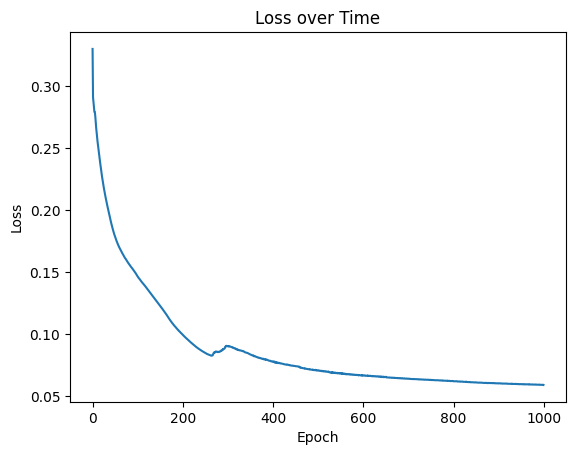

In [48]:
X = X.reshape(N * K, 1, 2)
y = y.reshape(N * K, 1, 1)

if __name__ == "__main__":
    epochs = 1000
    lr = 1e-2
    
    loss_function = BinaryCrossEntropy()
    model = SpiralNeural()
    
    samples = len(X)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        for sample in range(samples):
            output = model.forwardProp(X[sample].T)
            #print(f'NN output: {output}, expected value: {one_hot_encode(y[sample], size = 3).T}')
            #print(f'sample: {X[sample].T}')

            error += loss_function(output, one_hot_encode(y[sample], size = K).T)
            
            #print(f'Loss: {error}')
        
            loss = loss_function.backward()
            #print(f'Gradiant: {loss}')
            model.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        print('epoch %d/%d   error=%f' % (i+1, epochs, error))

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [49]:
X = X.reshape(N * K, 1, 2)

scores = []
for x in X:
    scores.append(model.forwardProp(x.T))
predicted_class = np.argmax(scores, axis=1)
y = y.reshape(N * K, 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.72


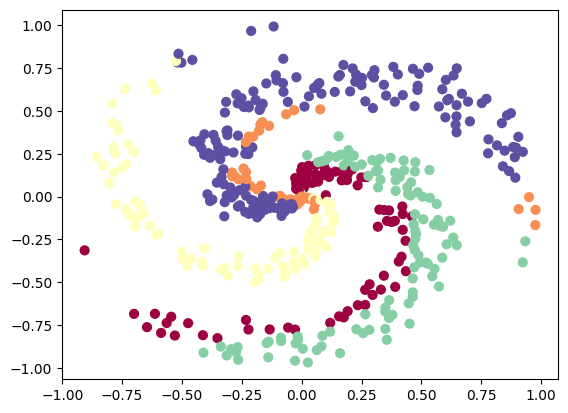

In [50]:
X = X.reshape(N * K, 2)
y = y.reshape(N * K, 1)
plt.scatter(X[:, 0], X[:, 1], c=predicted_class.T, s=40, cmap=plt.cm.Spectral)
plt.show()

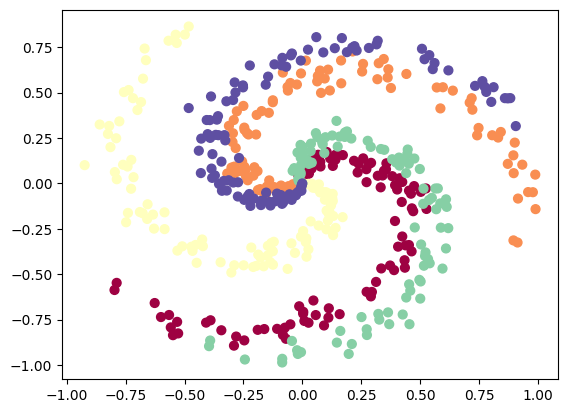

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()